In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [4]:
# seed 값 설정
seed = 2020
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
df = pd.read_csv('Project.csv', sep=',', encoding = 'euc-kr')
df = df.drop('Silver($)',axis = 1)
df

,date,Gold,Silver,Dow,Nas,S&P,CNY,EUR,JPY,USD
0,20200731,75628.90,926.271641,26428.32,10745.28,3271.12,170.67,1410.74,1137.32,1191.0
1,20200730,75110.59,897.475847,26313.65,10587.81,3246.22,170.68,1404.82,1138.13,1196.0
2,20200729,75110.45,932.827495,26539.57,10542.94,3258.44,170.56,1401.40,1137.09,1194.0
3,20200728,74342.85,935.967496,26379.28,10402.09,3218.44,171.27,1407.61,1140.26,1199.5
4,20200727,74332.14,942.098478,26584.77,10536.27,3239.41,170.88,1403.60,1136.81,1197.0
...,...,...,...,...,...,...,...,...,...,...
2597,20100806,44660.81,690.243220,10653.56,2288.47,1121.64,171.75,1534.00,1350.28,1163.0
2598,20100805,44870.25,685.811886,10674.98,2293.06,1125.81,172.02,1531.28,1349.94,1165.0
2599,20100804,45009.08,686.874468,10680.43,2303.57,1127.24,172.74,1543.23,1368.42,1170.0
2600,20100803,44425.74,691.629077,10636.38,2283.52,1120.46,172.49,1545.93,1359.20,1168.5


In [6]:
target = df.Nas
feature = df.drop('Nas', axis = 1)
feature

,date,Gold,Silver,Dow,S&P,CNY,EUR,JPY,USD
0,20200731,75628.90,926.271641,26428.32,3271.12,170.67,1410.74,1137.32,1191.0
1,20200730,75110.59,897.475847,26313.65,3246.22,170.68,1404.82,1138.13,1196.0
2,20200729,75110.45,932.827495,26539.57,3258.44,170.56,1401.40,1137.09,1194.0
3,20200728,74342.85,935.967496,26379.28,3218.44,171.27,1407.61,1140.26,1199.5
4,20200727,74332.14,942.098478,26584.77,3239.41,170.88,1403.60,1136.81,1197.0
...,...,...,...,...,...,...,...,...,...
2597,20100806,44660.81,690.243220,10653.56,1121.64,171.75,1534.00,1350.28,1163.0
2598,20100805,44870.25,685.811886,10674.98,1125.81,172.02,1531.28,1349.94,1165.0
2599,20100804,45009.08,686.874468,10680.43,1127.24,172.74,1543.23,1368.42,1170.0
2600,20100803,44425.74,691.629077,10636.38,1120.46,172.49,1545.93,1359.20,1168.5


In [7]:
X = feature.values
X

array([[2.02007310e+07, 7.56289000e+04, 9.26271641e+02, ...,
        1.41074000e+03, 1.13732000e+03, 1.19100000e+03],
       [2.02007300e+07, 7.51105900e+04, 8.97475847e+02, ...,
        1.40482000e+03, 1.13813000e+03, 1.19600000e+03],
       [2.02007290e+07, 7.51104500e+04, 9.32827495e+02, ...,
        1.40140000e+03, 1.13709000e+03, 1.19400000e+03],
       ...,
       [2.01008040e+07, 4.50090800e+04, 6.86874468e+02, ...,
        1.54323000e+03, 1.36842000e+03, 1.17000000e+03],
       [2.01008030e+07, 4.44257400e+04, 6.91629077e+02, ...,
        1.54593000e+03, 1.35920000e+03, 1.16850000e+03],
       [2.01008020e+07, 4.45346300e+04, 6.94507049e+02, ...,
        1.53418000e+03, 1.35269000e+03, 1.17400000e+03]])

In [8]:
Y = target.values
Y

array([10745.28, 10587.81, 10542.94, ...,  2303.57,  2283.52,  2295.36])

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, 
                                                    random_state=seed)

In [10]:
model = Sequential([
    Dense(2602, input_dim=9, activation='relu'),
    Dense(1301, activation='relu'),
    Dense(1)
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2602)              26020     
_________________________________________________________________
dense_1 (Dense)              (None, 1301)              3386503   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1302      
Total params: 3,413,825
Trainable params: 3,413,825
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mean_squared_error', optimizer='adam', metrics=["accuracy"])

In [12]:
model.fit(X_train, Y_train, epochs=200, batch_size=10)

Train on 1821 samples
Epoch 1/200
1821/1821 [==============================] - 3s 2ms/sample - loss: 1227455048836.6528 - accuracy: 0.0000e+00
Epoch 2/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 6648338.7303 - accuracy: 0.0000e+00
Epoch 3/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 7727810.2932 - accuracy: 0.0000e+00
Epoch 4/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 6506180.3109 - accuracy: 0.0000e+00
Epoch 5/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 6784288.6494 - accuracy: 0.0000e+00
Epoch 6/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 11100694.0350 - accuracy: 0.0000e+00
Epoch 7/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 6961171.5159 - accuracy: 0.0000e+00
Epoch 8/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 9711696.2592 - accuracy: 0.0000e+00
Epoch 9/200
1821/1821 [============================

1821/1821 [==============================] - 3s 1ms/sample - loss: 5926933.7090 - accuracy: 0.0000e+00
Epoch 72/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 2968174.5248 - accuracy: 0.0000e+00
Epoch 73/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 4009875.8957 - accuracy: 0.0000e+00
Epoch 74/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 4589990.1582 - accuracy: 0.0000e+00
Epoch 75/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 2703971.2412 - accuracy: 0.0000e+00
Epoch 76/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 1581869.8286 - accuracy: 0.0000e+00
Epoch 77/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 1239109.0715 - accuracy: 0.0000e+00
Epoch 78/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 873918.2971 - accuracy: 0.0000e+00
Epoch 79/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 201994

1821/1821 [==============================] - 3s 1ms/sample - loss: 218992.9390 - accuracy: 0.0000e+00
Epoch 142/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 244252.9860 - accuracy: 0.0000e+00
Epoch 143/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 320238.4729 - accuracy: 0.0000e+00
Epoch 144/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 205315.5064 - accuracy: 0.0000e+00
Epoch 145/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 241426.4069 - accuracy: 0.0000e+00
Epoch 146/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 223868.2884 - accuracy: 0.0000e+00
Epoch 147/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 278466.6416 - accuracy: 0.0000e+00
Epoch 148/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 258233.1379 - accuracy: 0.0000e+00
Epoch 149/200
1821/1821 [==============================] - 3s 1ms/sample - loss: 25013

In [15]:
Y_prediction = model.predict(X_test).flatten()
for i in range(500):
    label = Y_test[i]
    prediction = Y_prediction[i]
    print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

실제가격: 6210.190, 예상가격: 6214.264
실제가격: 7878.460, 예상가격: 7871.466
실제가격: 2383.670, 예상가격: 2569.807
실제가격: 3649.040, 예상가격: 3980.416
실제가격: 4419.480, 예상가격: 4514.191
실제가격: 4681.500, 예상가격: 4833.491
실제가격: 4638.910, 예상가격: 4731.877
실제가격: 5316.020, 예상가격: 5170.088
실제가격: 3122.570, 예상가격: 3498.662
실제가격: 3143.180, 예상가격: 3657.867
실제가격: 7606.460, 예상가격: 7588.446
실제가격: 3677.780, 예상가격: 3873.118
실제가격: 6247.150, 예상가격: 6335.033
실제가격: 2549.430, 예상가격: 2657.172
실제가격: 5838.810, 예상가격: 6097.710
실제가격: 10390.840, 예상가격: 8966.440
실제가격: 7872.270, 예상가격: 8501.968
실제가격: 7354.340, 예상가격: 7545.752
실제가격: 8117.670, 예상가격: 8790.982
실제가격: 2686.200, 예상가격: 3152.708
실제가격: 8887.220, 예상가격: 9309.378
실제가격: 7967.760, 예상가격: 8487.412
실제가격: 4337.510, 예상가격: 4424.518
실제가격: 6345.110, 예상가격: 6580.487
실제가격: 4227.170, 예상가격: 4395.524
실제가격: 7759.200, 예상가격: 7649.127
실제가격: 4947.440, 예상가격: 4986.544
실제가격: 10488.580, 예상가격: 9170.160
실제가격: 5547.490, 예상가격: 5758.061
실제가격: 5483.940, 예상가격: 5728.354
실제가격: 8091.160, 예상가격: 8558.159
실제가격: 7394.040, 예상가격: 7655.526
실제가격: 

In [19]:
pred = model.predict(X_test)

In [25]:
import matplotlib.pyplot as plt

In [35]:
a = Y_test[100:200]
b = pred[100:200]

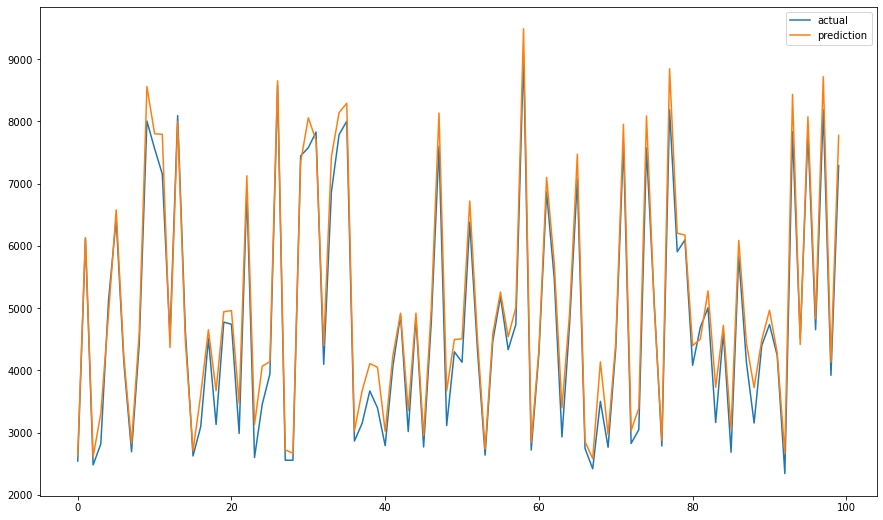

In [36]:
plt.figure(figsize=(15, 9))
plt.plot(a, label='actual')
plt.plot(b, label='prediction')
plt.legend()
plt.show()

In [22]:
import math

In [23]:
a = 0.0
for i in range(0,len(Y_test)):
    a += (Y_test[i]-pred[i])**2
b = a / len(Y_test)
c = math.sqrt(b)
print(c)

395.8643628188827
